In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

In [2]:
df_data = pd.read_excel("_ml_jug.xlsx")

In [3]:
model = KMeans(n_clusters=3, random_state= 43)

In [4]:
cc = pd.DataFrame()
cc = cc.assign(name = df_data["nombre"])
cc = cc.assign(pxg = df_data["pts_ganados"]/df_data['games_jug'])
cc = cc.assign(nfxg = df_data["NF_total"]/df_data['games_jug'])
cc = cc.assign(rem = (df_data["sm_total"] + df_data["nsmtotal"])/df_data['games_jug'])

cc = cc.groupby("name")[["pxg","nfxg","rem"]].mean().sort_values(by="pxg", ascending=False)

c_index = cc.index
cc.reset_index(inplace =True, drop=True)

cc1 = cc
cc = cc.values

plotear codo

C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inercia')

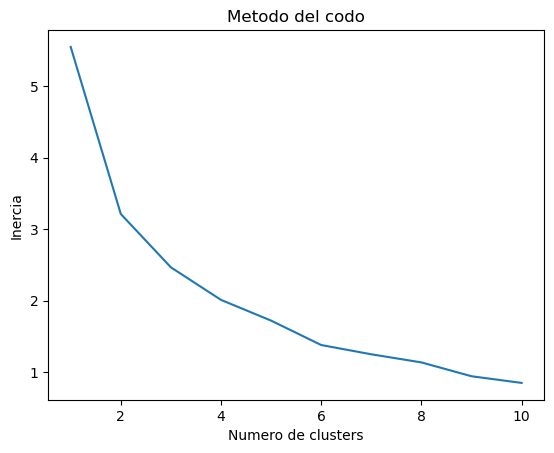

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')

Centromeros

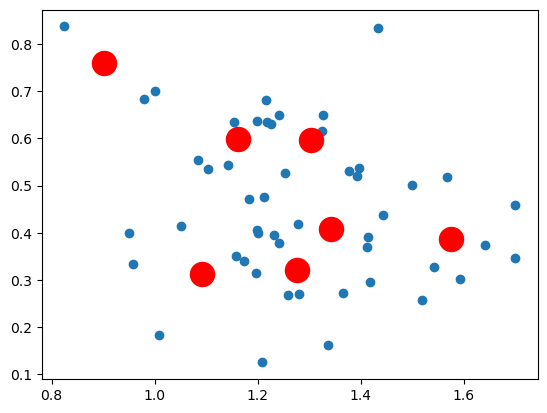

In [7]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cc)
plt.scatter(cc[:,0], cc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Preprocesado y modelado

Porcentaje de varianza explicada por cada componente
[0.55520096 0.30980206 0.13499698]


Text(0, 0.5, 'Por. varianza explicada')

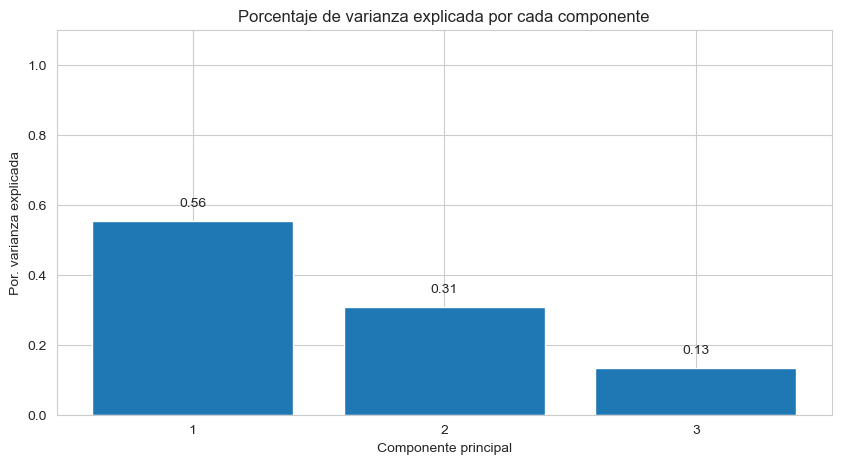

In [8]:
cc =cc1
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(cc)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(cc.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

Graficar por clusters

In [9]:
modelcc = model.fit(cc)
labels = modelcc.labels_

cc1['cluster_label'] = labels

#representamos puntos y centroides
# Obtener los Centroides
centroids = modelcc.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

cc1.set_index(c_index, inplace=True)
#print(cc1.sort_values("cluster_label"))
maskcc0 = (cc1['cluster_label'] == 0)
maskcc1 = (cc1['cluster_label'] == 1)
maskcc2 = (cc1['cluster_label'] == 2)


cluster_stats = cc1.groupby('cluster_label')['pxg'].describe()
#print(cluster_stats)
cluster_stats = cc1.groupby('cluster_label')['nfxg'].describe()
#print(cluster_stats)
cluster_stats = cc1.groupby('cluster_label')['rem'].describe()
#print(cluster_stats)




#colores
fondo = "#313332"
verde_lindo = "#46f892"
verde_claro = "#b5fdcd"
scattermedia ="#42424d" #alpha=0.9
text_color = "w"
color_set1 = '#3ff294' # gran verde
color_set2 = '#f4aa51' # amarillo arena naranja
celeste = "#31acce" 
celeste_claro = "#c1e6f0"


# Obtén las coordenadas de los puntos
x = cc1['pxg']
y = cc1['rem']
names = c_index  # Nombres de los puntos

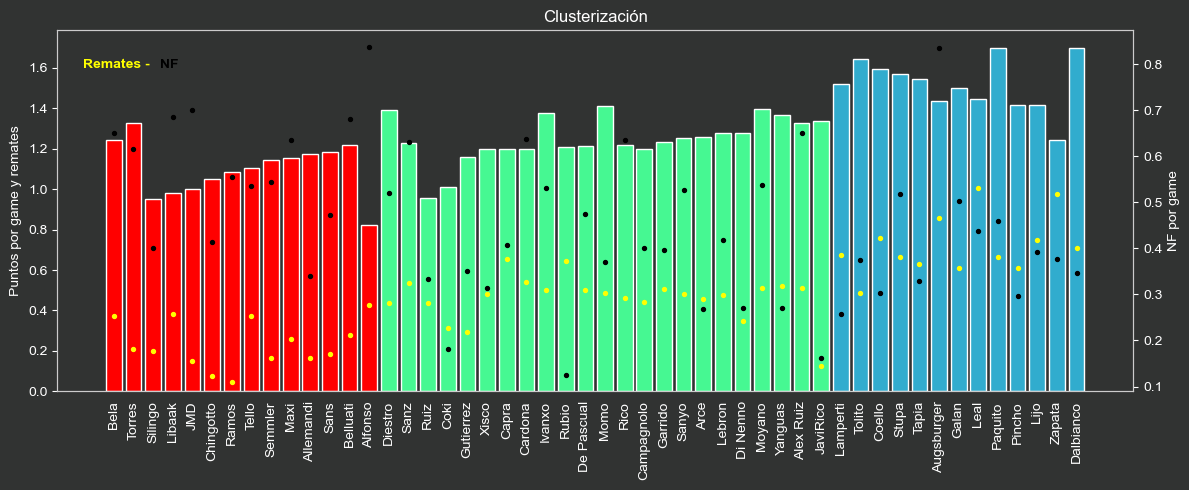

In [10]:
def g_bar(df):
    # Crea el gráfico scatter con nombres
    df= df.sort_values("cluster_label", ascending=False)
    fig, ax = plt.subplots(figsize=(12,5))
    fig.set_facecolor(fondo)
    ax.patch.set_facecolor(fondo)
    #sns.barplot(x= df.index, y=df["rem"], hue=df["cluster_label"])
    # Define una paleta de colores personalizada
    colores = [celeste, verde_lindo, "red"]

    # Asigna colores a las barras en función de los valores de "cluster_label"
    colores_barras = [colores[label] for label in df["cluster_label"]]
    ax.bar(df.index, df["pxg"], color=colores_barras)
    ax.scatter(df.index, df["rem"], color ="yellow", s=8)
    plt.xticks(rotation=90)
    ax.set_ylabel("Puntos por game y remates", color = "w")
    ax2 = ax.twinx()
    ax2.scatter(df.index, df["nfxg"], color ="black",s=8)
    ax2.set_ylabel("NF por game", color = "w")

    #cambiar colores
    ax.tick_params(axis="y", colors="white")
    ax2.tick_params(axis="y", colors="white")
    ax.tick_params(axis="x", colors="white")
   
    
    plt.title("Clusterización", color="w")
    ax.xaxis.grid(False)  # Desactivar las líneas de la cuadrícula en el eje x
    ax.yaxis.grid(False)
    ax.grid(False)
    ax2.grid(False)
    ax.text(0.2, 1.6, "Remates - ", color="yellow", weight='bold', ha='center')
    ax.text(2.8, 1.6, "NF", color="black", weight='bold', ha='center')
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
g_bar(cc1)

El PCA mostró la columna puntos por game como la que mejor explica al modelo - 56%. Esto concuerda con la division de roles de una pareja, en la cual si hay un jugador que hace pocos puntos se junta con uno que haga muchos puntos. Y, en el medio, hay jugadores que son mas hibridos, los cuales tienen un rendimiento variado en cuanto a los puntos por game y los errores no forzados que cometen. Al agregar los remates, se puede ver que tambien esta columna podria dividir en los mismos cluster a los jugadores, a pesar de que en el PCA explica el 13% de la varianza. Esto deja a entrever que los jugadores que mas puntos hacen aprovechan la via del remate para hacerlos

Hoy en dia, la pareja rankeada 4, tiene 2 jugadores del cluster verde, siendo uno de ellos el que mas puntos hace por game en el cluster y con pocos errores no forzados - Momo. En cambio su pareja tiene rendimientos mas variados, sobretodo en lo que respecta a errores no forzados - Sanyo. Esto denota que no hay una formula única en el armado de jugadores con respecto a los roles de cada uno